In [29]:
import numpy as np
from scipy import optimize

from astropy import units as u
from astropy import coordinates, time

from astropy.visualization import quantity_support, time_support
quantity_support()
time_support()

from matplotlib import pyplot as plt

In [4]:
waimea = coordinates.EarthLocation.of_address('Waimea,HI')
moorhead = coordinates.EarthLocation.of_address('Moorhead,MN')
baltimore = coordinates.EarthLocation.of_address('Baltimore,MD')

sites = {k:v for k,v in globals().items() if isinstance(v,coordinates.EarthLocation)}
sites

{'waimea': <EarthLocation (-5462363.75592517, -2470495.11483404, 2169824.23273799) m>,
 'moorhead': <EarthLocation (-513687.79193738, -4337617.84487266, 4632193.54418063) m>,
 'baltimore': <EarthLocation (1144613.27052072, -4808588.76374512, 4017361.83252225) m>}

# winter Solstice and setup

In [44]:
dt = np.linspace(0, 1, 100)*u.day
t0 = time.Time('2024-12-21')
ts = t0+ dt

In [45]:
aaframes = {k:coordinates.AltAz(obstime=ts, location=site) for k,site in sites.items()}

In [46]:
aadats = {k:coordinates.get_sun(ts).transform_to(aaf) for k, aaf in aaframes.items()}

Text(0, 0.5, 'sun alt [deg]')

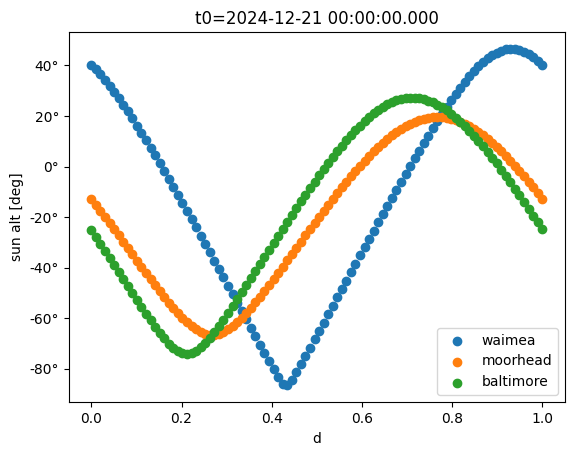

In [72]:
for k, v in aadats.items():
    plt.scatter(dt, v.alt, label=k)
plt.legend()
plt.title(f't0={t0}')
plt.ylabel(f'sun alt [{plt.gca().yaxis.get_label().get_text()}]')

In [97]:
def fopt(x, site):
    # if x > 1 or x < 0:
    #     return 1000.
    t = t0 + x*u.day
    f = coordinates.AltAz(obstime=t, location=site)
    sunaa = coordinates.get_sun(t).transform_to(f)
    return sunaa.alt.value

setdt = {k:optimize.root_scalar(fopt, x0=0, args=(site,)).root for k, site in sites.items()}
setdt

{'waimea': np.float64(0.1558386235344244),
 'moorhead': np.float64(-0.05921753560025594),
 'baltimore': np.float64(-0.09630652965994108)}

In [98]:
def get_derivative(dt, site):
    x = dt*u.day + [-1, 1]*u.millisecond
    t = t0 + x
    f = coordinates.AltAz(obstime=t, location=site)
    sunaas = coordinates.get_sun(t).transform_to(f)
    return ((sunaas[1].alt - sunaas[0].alt)/(2*u.millisecond)).to(u.deg/u.min)

{k:(t0+setdt[k]*u.day, get_derivative(setdt[k], site)) for k,site in sites.items()}

{'waimea': (<Time object: scale='utc' format='iso' value=2024-12-21 03:44:24.457>,
  <Quantity -0.21273137 deg / min>),
 'moorhead': (<Time object: scale='utc' format='iso' value=2024-12-20 22:34:43.605>,
  <Quantity -0.13894296 deg / min>),
 'baltimore': (<Time object: scale='utc' format='iso' value=2024-12-20 21:41:19.116>,
  <Quantity -0.16591884 deg / min>)}

In [99]:
risedt = {k:optimize.root_scalar(fopt, x0=0.5, args=(site,)).root for k, site in sites.items()}
risedt

{k:(t0+risedt[k]*u.day, get_derivative(risedt[k], site)) for k,site in sites.items()}

{'waimea': (<Time object: scale='utc' format='iso' value=2024-12-21 16:57:24.935>,
  <Quantity 0.21273118 deg / min>),
 'moorhead': (<Time object: scale='utc' format='iso' value=2024-12-21 14:15:39.466>,
  <Quantity 0.1389397 deg / min>),
 'baltimore': (<Time object: scale='utc' format='iso' value=2024-12-21 12:27:51.905>,
  <Quantity 0.1659149 deg / min>)}

Note the rise/set derivatives are almost identical except for sign, showing we only need one

# Summer Solstice

In [102]:
t0 = time.Time('2024-6-21')

In [103]:
risesetdt = {k:optimize.root_scalar(fopt, x0=0, args=(site,)).root for k, site in sites.items()}
risesetdt

{'waimea': np.float64(0.20892965698803007),
 'moorhead': np.float64(0.09661074383133798),
 'baltimore': np.float64(0.021773410510135247)}

In [105]:
{k:(t0+risesetdt[k]*u.day, get_derivative(risesetdt[k], site)) for k,site in sites.items()}

{'waimea': (<Time object: scale='utc' format='iso' value=2024-06-21 05:00:51.522>,
  <Quantity -0.21277691 deg / min>),
 'moorhead': (<Time object: scale='utc' format='iso' value=2024-06-21 02:19:07.168>,
  <Quantity -0.13897851 deg / min>),
 'baltimore': (<Time object: scale='utc' format='iso' value=2024-06-21 00:31:21.223>,
  <Quantity -0.16595609 deg / min>)}

Essentially identical to the winter solstice

# Spring Equinox

In [106]:
t0 = time.Time('2024-3-21')

In [108]:
risesetdt = {k:optimize.root_scalar(fopt, x0=0, args=(site,)).root for k, site in sites.items()}
{k:(t0+risesetdt[k]*u.day, get_derivative(risesetdt[k], site)) for k,site in sites.items()}

{'waimea': (<Time object: scale='utc' format='iso' value=2024-03-21 04:30:21.530>,
  <Quantity -0.23484062 deg / min>),
 'moorhead': (<Time object: scale='utc' format='iso' value=2024-03-21 00:35:39.887>,
  <Quantity -0.1707298 deg / min>),
 'baltimore': (<Time object: scale='utc' format='iso' value=2024-03-20 23:14:41.101>,
  <Quantity -0.19334632 deg / min>)}

# Fall Equinox

In [109]:
t0 = time.Time('2024-9-21')

In [110]:
risesetdt = {k:optimize.root_scalar(fopt, x0=0, args=(site,)).root for k, site in sites.items()}
{k:(t0+risesetdt[k]*u.day, get_derivative(risesetdt[k], site)) for k,site in sites.items()}

{'waimea': (<Time object: scale='utc' format='iso' value=2024-09-21 04:16:24.297>,
  <Quantity -0.23503208 deg / min>),
 'moorhead': (<Time object: scale='utc' format='iso' value=2024-09-21 00:22:34.090>,
  <Quantity -0.17112132 deg / min>),
 'baltimore': (<Time object: scale='utc' format='iso' value=2024-09-20 23:01:30.058>,
  <Quantity -0.19368553 deg / min>)}